# Day 09. Exercise 03
# Ensembles

## 0. Imports

In [79]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import joblib


## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test` and then get `X_train`, `y_train`, `X_valid`, `y_valid` from the previous `X_train`, `y_train`. Use the additional parameter `stratify`.

In [11]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')
y = pd.read_csv('../data/dayofweek.csv')
df.head()

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X = df
y = y['dayOfWeek']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=21, stratify=y_train)

## 2. Individual classifiers

1. Train SVM, decision tree and random forest again with the best parameters that you got from the 01 exercise with `random_state=21` for all of them.
2. Evaluate `accuracy`, `precision`, and `recall` for them on the validation set.
3. The result of each cell of the section should look like this:

```
accuracy is 0.87778
precision is 0.88162
recall is 0.87778
```

In [18]:
svm = SVC(kernel='rbf', C=10, gamma='auto', random_state=21, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_valid)

print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.87778
precision is 0.88162
recall is 0.87778


In [19]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=22, class_weight='balanced', random_state=21)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_valid)

print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")


accuracy is 0.86667
precision is 0.86984
recall is 0.86667


In [21]:
rf=RandomForestClassifier(n_estimators=50, max_depth=28, criterion='gini', random_state=21)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)

print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.89259
precision is 0.89361
recall is 0.89259


## 3. Voting classifiers

1. Using `VotingClassifier` and the three models that you have just trained, calculate the `accuracy`, `precision`, and `recall` on the validation set.
2. Play with the other parameteres.
3. Calculate the `accuracy`, `precision` and `recall` on the test set for the model with the best weights in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).

## 🗳️ VotingClassifier (простое определение)

**VotingClassifier** — это **ансамблевый метод**, который:

- **Объединяет несколько разных моделей** (например, SVM, Decision Tree, Random Forest).
- Использует **голосование** для принятия итогового решения о классе.
- Помогает **уменьшить ошибки отдельных моделей** за счёт их комбинации и повышает стабильность предсказаний.

### Параметры:
- `voting='hard'` — голосование по классам (большинство голосов).
- `voting='soft'` — голосование по усреднённым вероятностям.
- `weights=[1, 1, 2]` — задаёт вес каждой модели при голосовании, модели с большим весом влияют сильнее на итоговое решение.


In [24]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', dt), ('forest', rf)], voting='hard', verbose=True)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_valid)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.1s


In [25]:
print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.89630
precision is 0.89605
recall is 0.89630


In [26]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', dt), ('forest', rf)], voting='soft', verbose=True)

vc.fit(X_train, y_train)

y_pred = vc.predict(X_valid)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.1s


In [27]:
print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.88148
precision is 0.88418
recall is 0.88148


In [ ]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', dt), ('forest', rf)], voting='hard', verbose=True, weights=[1, 1, 2])

vc.fit(X_train, y_train)

y_pred = vc.predict(X_valid)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.1s


In [29]:
print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.89630
precision is 0.89712
recall is 0.89630


In [30]:
vc = VotingClassifier(estimators=[('svm', svm), ('tree', dt), ('forest', rf)], voting='hard', verbose=True, weights=[1, 1, 2])

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

[Voting] ...................... (1 of 3) Processing svm, total=   0.4s
[Voting] ..................... (2 of 3) Processing tree, total=   0.0s
[Voting] ................... (3 of 3) Processing forest, total=   0.1s


In [31]:
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.90533
precision is 0.90694
recall is 0.90533


## 4. Bagging classifiers

1. Using `BaggingClassifier` and `SVM` with the best parameters create an ensemble, try different values of the `n_estimators`, use `random_state=21`.
2. Play with the other parameters.
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision)

## 🪐 BaggingClassifier 

**BaggingClassifier** — это **ансамблевый метод**, который:
- Обучает **несколько одинаковых моделей (обычно деревья или SVM)** на **разных случайных подвыборках данных с возвращением (bootstrap)**.
- Итоговое предсказание получается через **усреднение (регрессия) или голосование (классификация)** по предсказаниям всех моделей.
- Помогает **снизить переобучение (variance)** и делает модель устойчивее к шуму.

### 🔹 Принцип работы:
1️⃣ Создаётся `n_estimators` случайных подвыборок из данных.  
2️⃣ На каждой подвыборке обучается одна модель.  
3️⃣ Для новых данных итоговое предсказание определяется голосованием/средним.

### 🔹 Основные параметры:
- `estimator` — базовая модель (по умолчанию DecisionTree).  
- `n_estimators` — количество моделей в ансамбле.  
- `bootstrap=True/False` — использовать ли bootstrap при создании подвыборок.  
- `max_samples`, `max_features` — размер подвыборок и количество признаков.  
- `random_state` — для воспроизводимости.  
- `n_jobs=-1` — использовать все ядра процессора для ускорения обучения.


In [33]:
bc = BaggingClassifier(estimator=svm, n_estimators=100, random_state=21, n_jobs=-1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_valid)

In [34]:
print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

accuracy is 0.88519
precision is 0.89396
recall is 0.88519


In [35]:
bc = BaggingClassifier(estimator=svm, random_state=21)
params = {
    'n_estimators': [10, 30, 60, 90],
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

grid_search = GridSearchCV(estimator=bc, param_grid=params, scoring='accuracy', n_jobs=-1)

In [36]:
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_valid)

In [39]:
print("Best Params:", grid_search.best_params_)
print("Best Score (accuracy):", grid_search.best_score_)

print(f"accuracy is {accuracy_score(y_valid, y_pred):.5f}")
print(f"precision is {precision_score(y_valid, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_valid, y_pred, average='weighted'):.5f}")

Best Params: {'bootstrap': False, 'n_estimators': 30, 'warm_start': True}
Best Score (accuracy): 0.8431955211024977
accuracy is 0.88889
precision is 0.89378
recall is 0.88889


## 5. Stacking classifiers

1. To achieve reproducibility in this case you will have to create an object of cross-validation generator: `StratifiedKFold(n_splits=n, shuffle=True, random_state=21)`, where `n` you will try to optimize (the details are below).
2. Using `StackingClassifier` and the three models that you have recently trained, calculate the `accuracy`, `precision` and `recall` on the validation set, try different values of `n_splits` `[2, 3, 4, 5, 6, 7]` in the cross-validation generator and parameter `passthrough` in the classifier itself,
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision). Use `final_estimator=LogisticRegression(solver='liblinear')`.

## 🪐 StackingClassifier 

**StackingClassifier** — это **ансамблевый метод**, который:
- Объединяет **несколько разных моделей (base learners)** и использует **их предсказания как новые признаки для финальной модели (meta-learner)**.
- Финальная модель учится **оптимально комбинировать предсказания базовых моделей**, улучшая итоговое качество.
- Помогает **снизить ошибки отдельных моделей и использовать их сильные стороны**.

### 🔹 Принцип работы:
1️⃣ Базовые модели обучаются на исходных данных и делают предсказания.  
2️⃣ Эти предсказания собираются в новый датасет признаков.  
3️⃣ Финальная модель (обычно `LogisticRegression`) обучается на этих признаках.

### 🔹 Основные параметры:
- `estimators` — список базовых моделей.  
- `final_estimator` — модель, обучающаяся на предсказаниях базовых моделей.  
- `cv` — стратегия кросс-валидации (часто `StratifiedKFold`), регулирует, как собираются данные для обучения meta-модели.  
- `passthrough=True/False` — добавлять ли исходные признаки вместе с предсказаниями базовых моделей в meta-модель.  
- `stack_method` — метод получения предсказаний от базовых моделей (`predict`, `predict_proba`).

### ✅ Когда применять:
Используется, когда нужно:
- Усилить сильные модели, объединяя их.  
- Учесть **разные подходы к данным** в одной модели.  
- Получить **более высокую точность** по сравнению с Voting и Bagging.


In [41]:
results = []

for n in range(2, 8):
    for passthrough in [True, False]:
        skf = StratifiedKFold(n_splits=n, random_state=21, shuffle=True)
        stack = StackingClassifier(
            estimators=[('svm', svm), ('tree', dt), ('forest', rf)],
            final_estimator=LogisticRegression(solver='liblinear'),
            cv=skf,
            passthrough=passthrough,
            n_jobs=-1
        )
        
        stack.fit(X_train, y_train)
        y_pred = stack.predict(X_valid)
        
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, average='weighted')
        recall = recall_score(y_valid, y_pred, average='weighted')
        
        results.append({
            'n_splits': n,
            'passthrough': passthrough,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall
        })

In [43]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(['accuracy', 'precision'], ascending=[False, False])
print(results_df.head())

best_params = results_df.iloc[0]
print("Best parameters:")
print(best_params)

    n_splits  passthrough  accuracy  precision    recall
7          5        False  0.914815   0.916587  0.914815
6          5         True  0.911111   0.914523  0.911111
5          4        False  0.907407   0.909423  0.907407
10         7         True  0.907407   0.909015  0.907407
8          6         True  0.907407   0.908809  0.907407
Best parameters:
n_splits              5
passthrough       False
accuracy       0.914815
precision      0.916587
recall         0.914815
Name: 7, dtype: object


In [44]:
skf = StratifiedKFold(n_splits=best_params['n_splits'], random_state=21, shuffle=True)
final_model = StackingClassifier(
    estimators=[('svm', svm), ('tree', dt), ('forest', rf)],
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=skf,
    passthrough=best_params['passthrough'],
    n_jobs=-1
)


In [45]:
final_model.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))
y_pred = final_model.predict(X_test)

print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.93195
precision is 0.93350
recall is 0.93195


## 6. Predictions

1. Choose the best model in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).
2. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which labname and for which users.
3. Save the model.

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       1.00      0.93      0.96        55
           2       0.93      0.93      0.93        30
           3       0.92      0.96      0.94        80
           4       0.90      0.90      0.90        21
           5       0.89      0.93      0.91        54
           6       0.93      0.97      0.95        71

    accuracy                           0.93       338
   macro avg       0.93      0.91      0.92       338
weighted avg       0.93      0.93      0.93       338



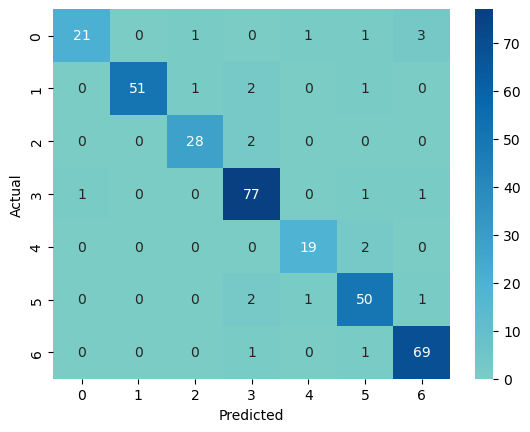

In [52]:
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='GnBu', center=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

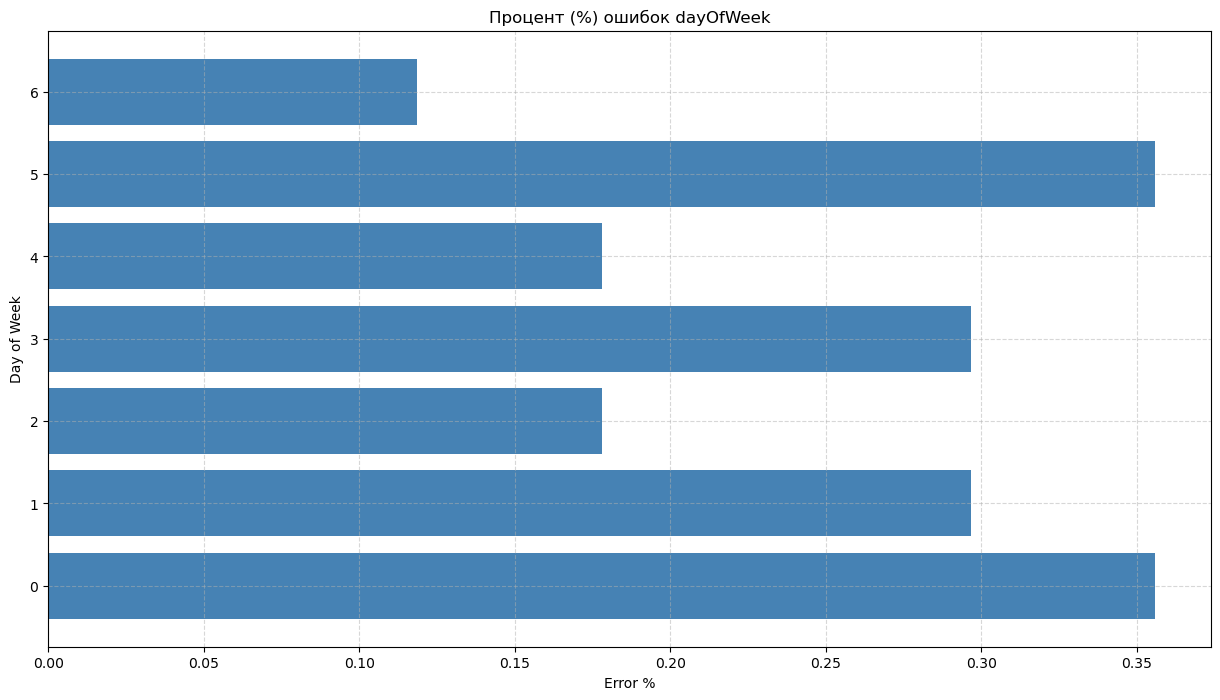

In [60]:
dayofweek = pd.merge(X, y, left_index=True, right_index=True)
dayofweek['prediction'] = final_model.predict(X)
dayofweek['is_correct'] = (dayofweek['prediction'] == dayofweek['dayOfWeek']).astype(int)

dayofweek = dayofweek[['dayOfWeek', 'is_correct']]
group = dayofweek.groupby(['dayOfWeek', 'is_correct']).size().unstack()

count = dayofweek.shape[0]
errors = group[0].apply(lambda x: x / count * 100 )

plt.figure(figsize=(15, 8))
plt.barh(errors.index, errors, color='steelblue')
plt.title("Процент (%) ошибок dayOfWeek")
plt.xlabel("Error %")
plt.ylabel("Day of Week")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [67]:
df = pd.merge(X, y, left_index=True, right_index=True)
df['prediction'] = final_model.predict(X)
df['is_correct'] = (df['prediction'] == df['dayOfWeek']).astype(int)

In [76]:
def show_most_errors(name, top_n=30):
   
    columns_to_select = df.columns[df.columns.str.contains(name, case=False)]
    
    if len(columns_to_select) == 0:
        print(f"Колонок, содержащих '{name}', не найдено в df.")
        return

    # Создаём датафрейм только с найденными колонками и is_correct
    df['is_correct'] = (df['prediction'] == df['dayOfWeek']).astype(int)
    name_df = pd.merge(df[columns_to_select], df[['is_correct']], left_index=True, right_index=True)

    # Группируем по is_correct и суммируем по колонкам
    grouped = name_df.groupby('is_correct').sum()

    # Считаем процент относительно всего датасета
    count = name_df.shape[0]
    grouped = grouped.apply(lambda x: x / count * 100).fillna(0)

    # Оставляем только ошибочные (is_correct == False → 0)
    grouped_errors = grouped.loc[0]

    # Сортируем и берём top_n
    grouped_errors = grouped_errors.sort_values(ascending=False).head(top_n)

    # Визуализация
    plt.figure(figsize=(12, 8))
    grouped_errors.plot(kind='barh', color='steelblue')
    plt.title(f"Процент ошибок по признакам, содержащим '{name}' (топ-{top_n})")
    plt.xlabel("Error %")
    plt.ylabel("Feature")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()



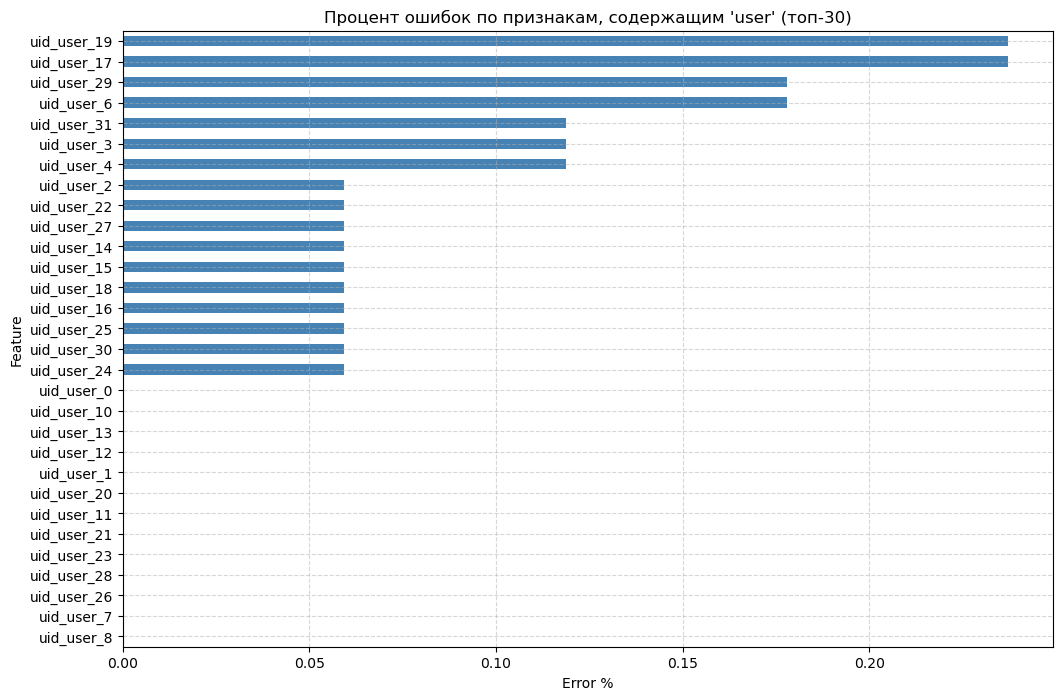

In [77]:
show_most_errors('user')

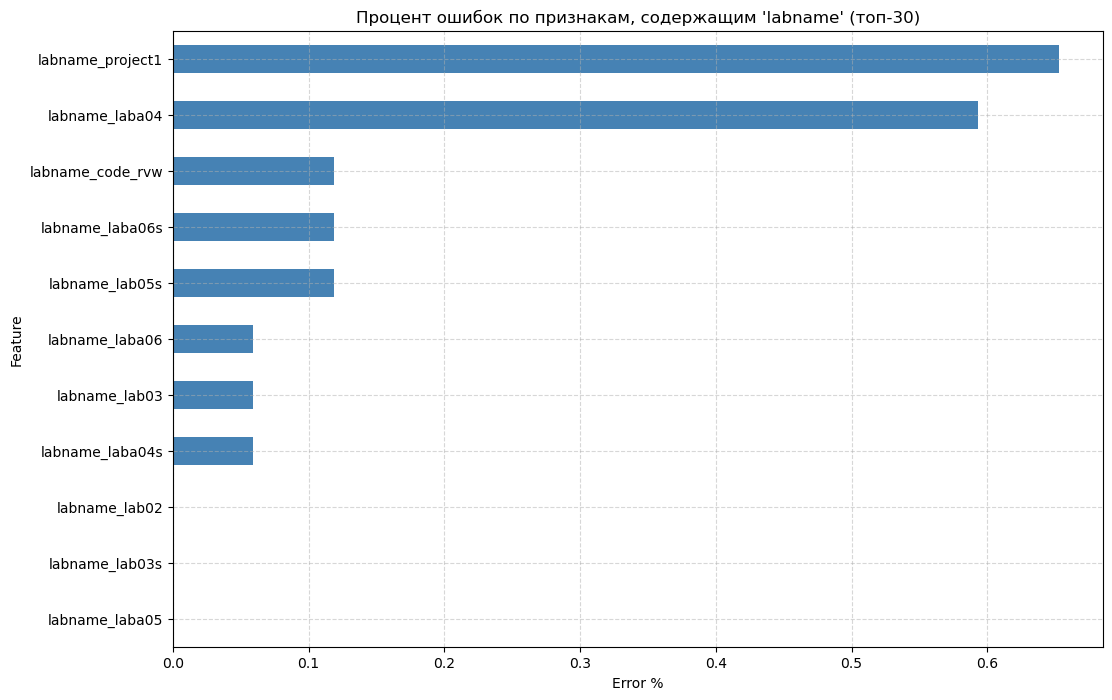

In [78]:
show_most_errors('labname')

In [80]:
joblib.dump(final_model, '../data/model_ex03.pkl')

['../data/model_ex03.pkl']